<a href="https://colab.research.google.com/github/BAEK-SEUNGYUN/modu_deep/blob/main/modu_wine_overfit_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# wine 데이터 그래프로 확인하기

이전에 제대로 나오지 않은 그래프를 다시 그려보자

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
# seed 값 설정
np.random.seed(3)
tf.random.set_seed(3)

In [5]:
# wine 데이터를 가지고 온다
df_pre = pd.read_csv('/content/drive/MyDrive/dataset/wine.csv')

In [6]:
# 데이터의 15%만 샘플로 가지고 온다
df = df_pre.sample(frac=0.15)

In [7]:
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

In [8]:
# 모델의 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
# 모델 컴파일
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [11]:
# 모델 저장 폴더 설정
MODEL_DIR = './model/'

if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

In [12]:
# 모델 저장 조건 설저
modelpath = "./model/{epoch:02d}_{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

In [13]:
# 모델 실행 및 저장
history = model.fit(X,Y,validation_split=0.33, epochs=3500, batch_size=500)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 1001/3500
2/2 [==============================] - 0s 39ms/step - loss: 0.0319 - accuracy: 0.9963 - val_loss: 0.0569 - val_accuracy: 0.9845
Epoch 1002/3500
2/2 [==============================] - 0s 33ms/step - loss: 0.0327 - accuracy: 0.9939 - val_loss: 0.0578 - val_accuracy: 0.9845
Epoch 1003/3500
2/2 [==============================] - 0s 28ms/step - loss: 0.0307 - accuracy: 0.9919 - val_loss: 0.0524 - val_accuracy: 0.9907
Epoch 1004/3500
2/2 [==============================] - 0s 31ms/step - loss: 0.0287 - accuracy: 0.9963 - val_loss: 0.0543 - val_accuracy: 0.9907
Epoch 1005/3500
2/2 [==============================] - 0s 27ms/step - loss: 0.0370 - accuracy: 0.9932 - val_loss: 0.0527 - val_accuracy: 0.9907
Epoch 1006/3500
2/2 [==============================] - 0s 27ms/step - loss: 0.0319 - accuracy: 0.9956 - val_loss: 0.0584 - val_accuracy: 0.9845
Epoch 1007/3500
2/2 [==============================] - 0s 27ms/step - loss: 0.0383 - accuracy: 0.990

In [14]:
# y_vloss 에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss = history.history['val_loss']

In [15]:
# y_acc 에 학습 셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

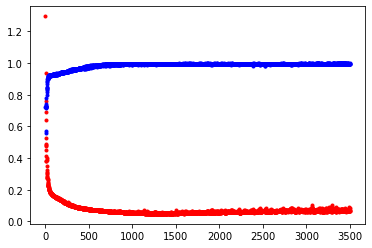

In [16]:
# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

파란색이 학습셋의 정확도, 빨간색이 테스트셋의 오차이다.

학습셋의 정확도는 시간이 흐를수록 좋아지지만, 테스트 결과는 어정도 이상 시간이 흐르면 더 나아지지 않는 것을 그래프를 통해 확인할 수 있다.

## 학습의 자동 중단

학습이 진행될수록 학습셋의 정확도는 올라가지만 **과적합** 때무에 테스트셋의 실험 결과는 점점 나빠지게 된다.

EarlyStopping() 함수를 사용하면 학습 진행중 테스트셋 오차가 줄지 않으면 학습을 멈추게 한다.

In [17]:
# EarlyStopping() 함수를 사용하기 위한 라이브러리
from keras.callbacks import EarlyStopping

In [18]:
# EarlyStopping() 함수에 모니터할 값, 몇번까지 기다릴지 정한다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [19]:
# 모델을 다시 실행
model.fit(X,Y, validation_split = 0.33, epochs=3500, batch_size=500, callbacks=[early_stopping_callback])

Epoch 1/3500
2/2 [==============================] - 0s 54ms/step - loss: 0.0129 - accuracy: 0.9985 - val_loss: 0.0887 - val_accuracy: 0.9876
Epoch 2/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.0261 - accuracy: 0.9939 - val_loss: 0.0780 - val_accuracy: 0.9876
Epoch 3/3500
2/2 [==============================] - 0s 27ms/step - loss: 0.0173 - accuracy: 0.9969 - val_loss: 0.0633 - val_accuracy: 0.9876
Epoch 4/3500
2/2 [==============================] - 0s 26ms/step - loss: 0.0235 - accuracy: 0.9908 - val_loss: 0.0629 - val_accuracy: 0.9876
Epoch 5/3500
2/2 [==============================] - 0s 25ms/step - loss: 0.0144 - accuracy: 0.9969 - val_loss: 0.0932 - val_accuracy: 0.9845
Epoch 6/3500
2/2 [==============================] - 0s 27ms/step - loss: 0.0288 - accuracy: 0.9954 - val_loss: 0.0890 - val_accuracy: 0.9876
Epoch 7/3500
2/2 [==============================] - 0s 41ms/step - loss: 0.0235 - accuracy: 0.9969 - val_loss: 0.0584 - val_accuracy: 0.9938
Epoch 8/3500


epoch를 3500으로 지정했지만 107번만에 학습이 종료되었다.

과적합을 막는 방법은 - 트레이닝셋과 테스트셋 나누기, earlyStopping, dropout. 대표적으로 이렇게 3가지이다.